Team: 418 I'm a teapot 

Objective: Given Airbnb listings.csv data, we aim to predict the listing price (only the short term price) for different house using pre-processed predictors.

In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("ggplot")
from collections import Counter
from nltk.tokenize import TweetTokenizer
#from nltk.stem import WordNetLemmatizer
#from nltk.corpus import stopwords

listings = pd.read_csv("C:/Users/XinYue/Desktop/data dive/Economics/Real Estate/Airbnb Seattle Listings/listings.csv")

In [2]:
#listings = pd.read_csv("...path/Airbnb Seattle Listings/listings.csv")
listings[0:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


We decided to investigate on the following features from the data set: description (length), accommodates, bathrooms, bedrooms, beds, bed_type, property_type, amenities(length and type), host_about(length) and host_response_rate.
First of all, we noticed that the raw data has a lot of NaN values which could not contribute to the future prediction, so we remove them:

In [3]:
# feature extracted
df = listings[["id","price","description","accommodates","bathrooms", 
               "bedrooms", "beds", "bed_type", "property_type",
               "amenities", "host_about", "host_response_rate"]]

# remove row which contains NaN value 
df = df.dropna(how='any')

# tokenizer
tknzr = TweetTokenizer()
# list of punctuation to remove
punctuation = list(string.punctuation)

Next, we cleaned the feature description and obtained its length for each host.

In [4]:
description_count = []
# counting the number of words in the description
for row in df["description"]:
    row = tknzr.tokenize(row)
    # remove punctuation
    filter_row = [word for word in row if word not in punctuation]
    description_count.append(len(filter_row))

# adding new column into the data frame
df["description_length"]=  description_count

Getting the host_about description length:

In [5]:
host_about_count = []
# counting the number of words in host_about
for row in df["host_about"]:
    row = str(row)
    if row == "nan":
        host_about_count.append(0)
    else:
        row = str(row)
        row = tknzr.tokenize(row)
        # remove punctuation
        filter_row = [word for word in row if word not in punctuation]
        host_about_count.append(len(filter_row))

# adding new column into the data frame
df["host_about_length"]=  host_about_count

In [6]:
amenities_count = []
# counting the number of words in amenities
for row in df["amenities"]:
    row = row.split(",")
    amenities_count.append(len(row))

# adding new column into the data frame
df["amenities_length"]=  amenities_count

In [7]:
# tv_internet = 0 if no tv nor internet
# tv_internet = 1 only tv
# tv_internet = 2 only internet
# tv_internet = 3 both included
tv_internet = []

for row in df["amenities"]:
    row = row.lower()
    row = tknzr.tokenize(row)
    filter_row = [word for word in row if word not in punctuation]

    if "tv" in filter_row:
        if "internet" in filter_row:
            tv_internet.append(3)
        else:
            tv_internet.append(1)
    elif "internet" in filter_row:
        tv_internet.append(2)
    else:
        tv_internet.append(0)
        
# adding new column into the data frame
df["tv_internet"]=  tv_internet

In [8]:
# cleaning data
# convert price string into float number
price = df["price"]
clean_price = []
for p in price:
    temp = p[1:].replace(",","")
    clean_price.append(float(temp))
df["price"] = clean_price

Next, we showed the global price range of house in Seattle, we observed that the average listing price is around 100$.

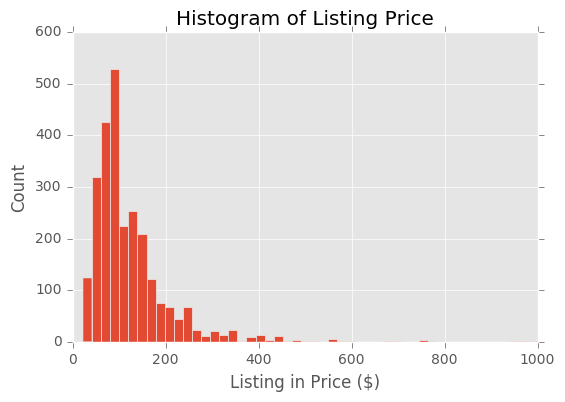

In [9]:
# plot of price range
df["price"].hist(bins=50)
plt.xlabel("Listing in Price ($)")
plt.ylabel("Count")
plt.title("Histogram of Listing Price")

Now we investigate the relationship between price and the description length of the listing house. We can see the majority of the description length is around 150 words to 200 words. There is no obvious pattern or linear trend.

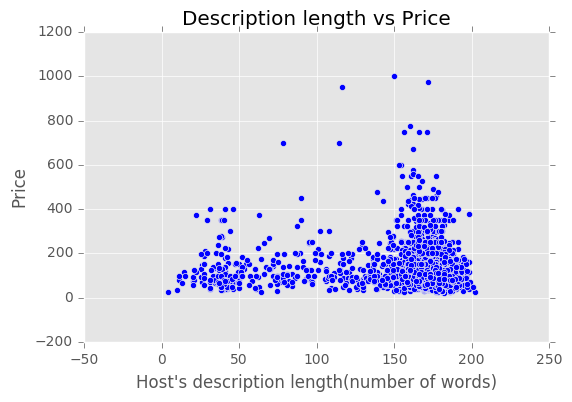

In [10]:
# plot: price vs description length
plt.scatter(df["description_length"],df["price"])
plt.xlabel("Host's description length(number of words)")
plt.ylabel("Price")
plt.title("Description length vs Price")

Similarly for host_about description length, there's no obvious pattern.

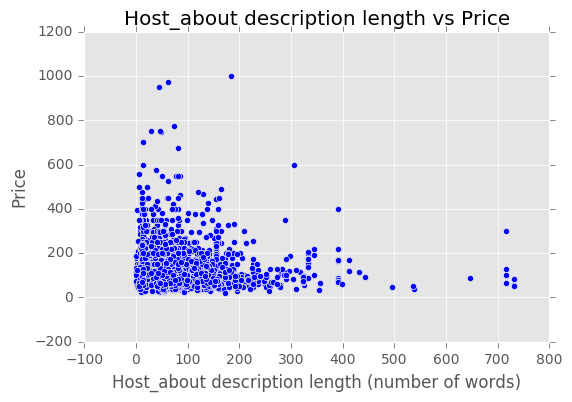

In [11]:
# plot: price vs host_about length
plt.scatter(df["host_about_length"],df["price"])
plt.xlabel("Host_about description length (number of words)")
plt.ylabel("Price")
plt.title("Host_about description length vs Price")

Now we investigate the number of amenities listed. we can see that the number of amenities does not grow with increasing price.

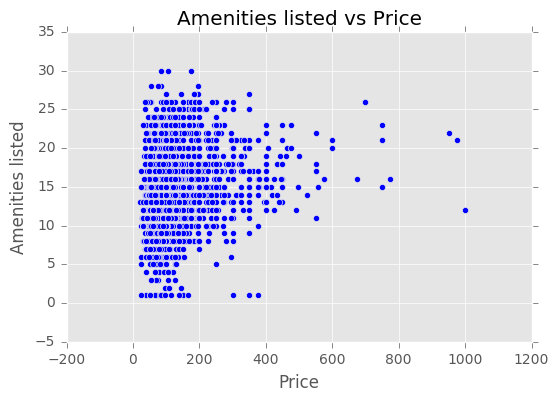

In [12]:
# plot: price vs amenities
plt.scatter(df["price"],df["amenities_length"])
plt.ylabel("Amenities listed")
plt.xlabel("Price")
plt.title("Amenities listed vs Price")

Then, we chose to investigate the relationship of price and 2 specific amenities: Internet and TV (what people usually consider the most for short term trip). We can see that the price varies more when we have both Internet and TV in the listing house.

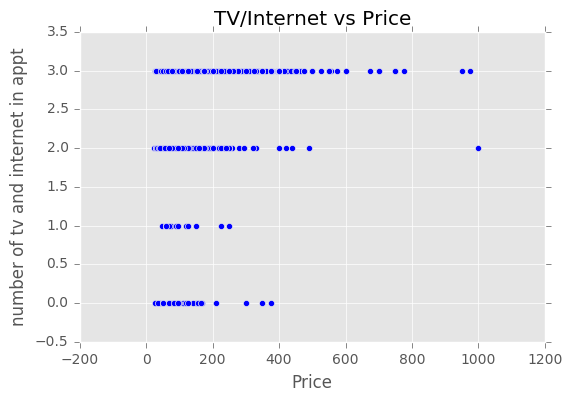

In [13]:
# Legend
# tv_internet = 0 if no tv nor internet
# tv_internet = 1 only tv
# tv_internet = 2 only internet
# tv_internet = 3 both included

# plot: price vs TV/Internet
plt.scatter(df["price"],df["tv_internet"])
plt.ylabel("number of tv and internet in appt")
plt.xlabel("Price")
plt.title("TV/Internet vs Price")

Then, we investigate the relationship between the number of bedrooms and price.

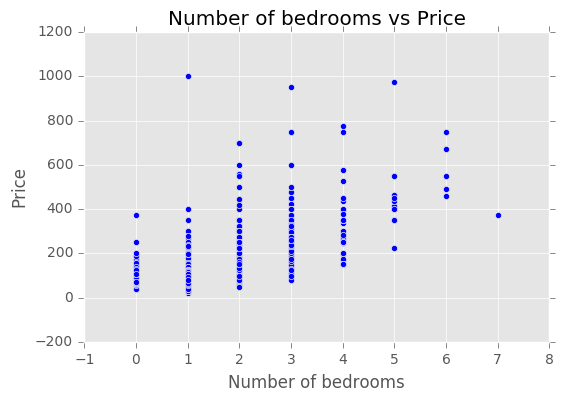

In [14]:
# plot: price vs number of bedrooms
plt.scatter(df["bedrooms"],df["price"])
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.title("Number of bedrooms vs Price")

COMMENT:

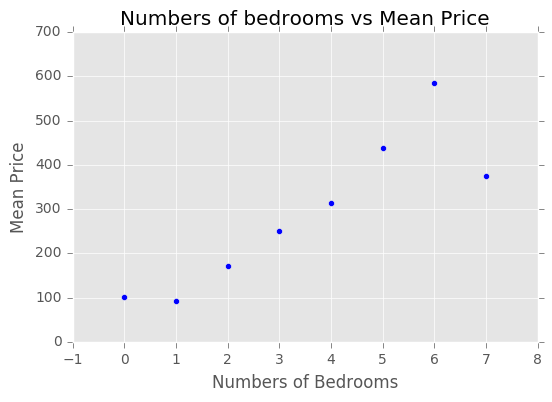

In [15]:
bedrooms_cluster = df.groupby(["bedrooms"]).mean()
# plot: price vs accommodates
plt.scatter(bedrooms_cluster.index,bedrooms_cluster["price"])
plt.xlabel("Numbers of Bedrooms")
plt.ylabel("Mean Price")
plt.title("Numbers of bedrooms vs Mean Price")

COMMENT:

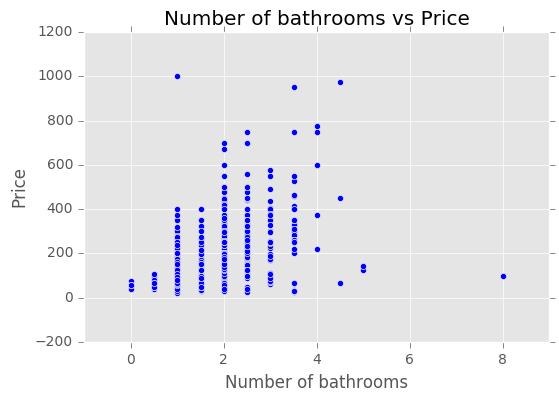

In [16]:
# plot: price vs bathrooms
plt.scatter(df["bathrooms"],df["price"])
plt.xlabel("Number of bathrooms")
plt.ylabel("Price")
plt.title("Number of bathrooms vs Price")

COMMENT:

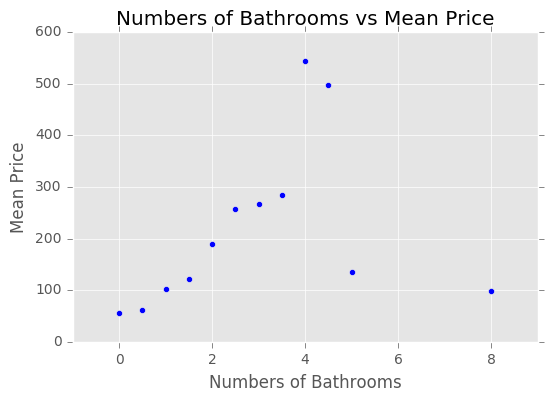

In [17]:
bathrooms_cluster = df.groupby(["bathrooms"]).mean()
# plot: price vs accommodates
plt.scatter(bathrooms_cluster.index,bathrooms_cluster["price"])
plt.xlabel("Numbers of Bathrooms")
plt.ylabel("Mean Price")
plt.title("Numbers of Bathrooms vs Mean Price")

COMMENT:

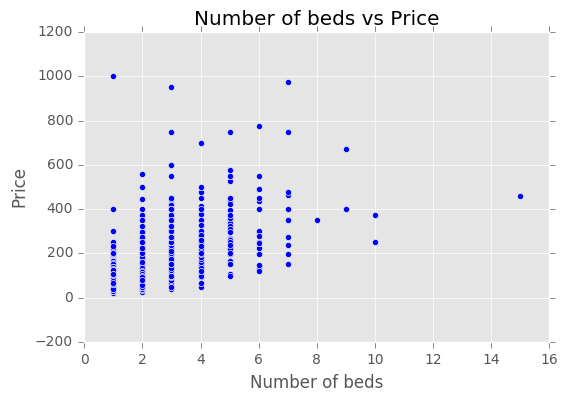

In [18]:
# plot: price vs beds
plt.scatter(df["beds"],df["price"])
plt.xlabel("Number of beds")
plt.ylabel("Price")
plt.title("Number of beds vs Price")

COMMENT:

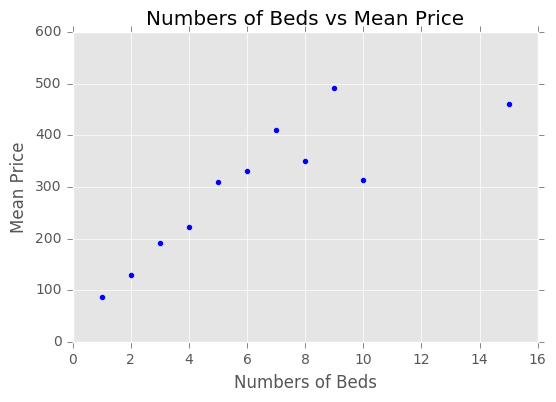

In [19]:
bed_cluster = df.groupby(["beds"]).mean()
# plot: price vs accommodates
plt.scatter(bed_cluster.index,bed_cluster["price"])
plt.xlabel("Numbers of Beds")
plt.ylabel("Mean Price")
plt.title("Numbers of Beds vs Mean Price")

COMMENT:

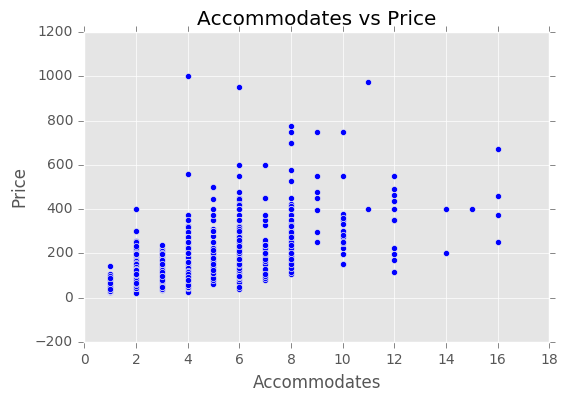

In [20]:
# plot: price vs accommodates
plt.scatter(df["accommodates"],df["price"])
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.title("Accommodates vs Price")

COMMENT:

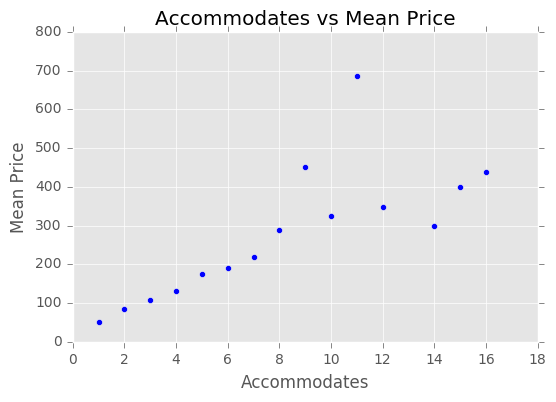

In [21]:
accommodates_cluster = df.groupby(["accommodates"]).mean()
# plot: price vs accommodates
plt.scatter(accommodates_cluster.index,accommodates_cluster["price"])
plt.xlabel("Accommodates")
plt.ylabel("Mean Price")
plt.title("Accommodates vs Mean Price")

COMMENT:

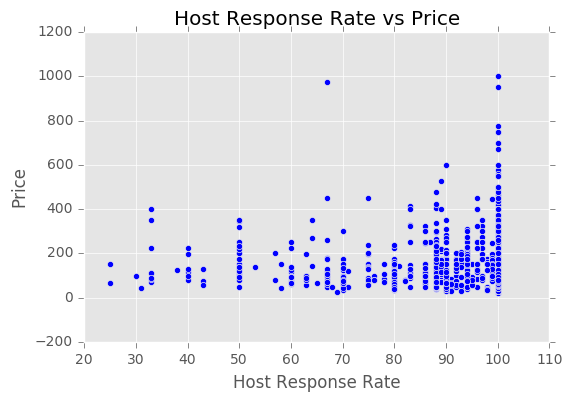

In [22]:
# cleaning
#strip('%')
rate = df["host_response_rate"]
new_rate = []
for row in rate:
    row = str(row).strip('%')
    new_rate.append(float(row))
df["host_response_rate"] = new_rate

# plot: price vs host reponse rate
plt.scatter(df["host_response_rate"],df["price"])
plt.xlabel("Host Response Rate")
plt.ylabel("Price")
plt.title("Host Response Rate vs Price")

COMMENT:

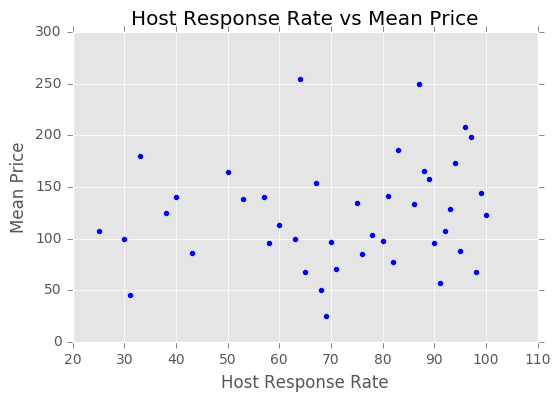

In [23]:
rate_cluster = df.groupby(["host_response_rate"]).mean()
# plot: price vs host response rate
plt.scatter(rate_cluster.index,rate_cluster["price"])
plt.xlabel("Host Response Rate")
plt.ylabel("Mean Price")
plt.title("Host Response Rate vs Mean Price")

COMMENT:

In [40]:
# Prediction examples
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

df = shuffle(df)

In [41]:
# OLS regression model:
model_data = df[["price","accommodates","bathrooms","bedrooms","beds","amenities_length","tv_internet"]]
length = len(model_data)
sep = int(length*0.8)
train = model_data.iloc[:sep]
Y_train = train["price"].as_matrix()
X_train = train[["accommodates","bathrooms","bedrooms","beds","amenities_length","tv_internet"]].as_matrix()
test = model_data.iloc[sep:]
Y_test = test["price"].as_matrix()
X_test = test[["accommodates","bathrooms","bedrooms","beds","amenities_length","tv_internet"]].as_matrix()

# Train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 3445.28
Variance score: 0.57


COMMENT:

In [34]:
# regression model 2:
model_data = df[["price","bathrooms","bedrooms","beds"]]
length = len(model_data)
sep = int(length*0.8)
train = model_data.iloc[:sep]
Y_train = train["price"].as_matrix()
X_train = train[["bathrooms","bedrooms","beds"]].as_matrix()
test = model_data.iloc[sep:]
Y_test = test["price"].as_matrix()
X_test = test[["bathrooms","bedrooms","beds"]].as_matrix()

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 3929.40
Variance score: 0.54


COMMENT:

In [35]:
# K-NN method 
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 4901.72
Variance score: 0.43


COMMENT: